# With K-Means: 

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 

In [45]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Machine Learning\1632560262896716.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


At first I want to make clusters considering two features: "Age" and "Income". After That, I will make clusters using all featrures in the dataset.

In [46]:
cdf = df[['Age', 'Annual Income (k$)']]
cdf.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


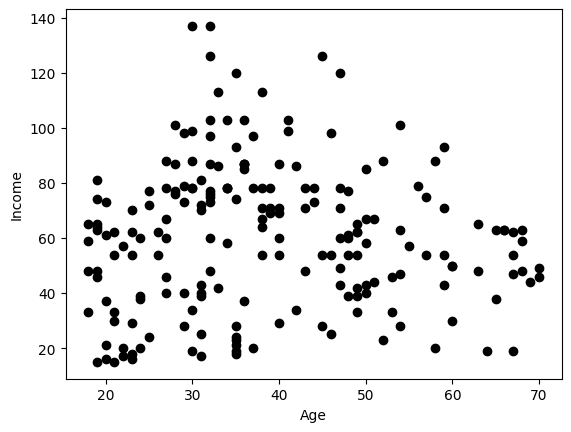

In [72]:
plt.scatter(df.Age, df['Annual Income (k$)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

We have to **Normalize** the data:

In [48]:
x = cdf[['Age', 'Annual Income (k$)']].values
print(x[0:10])

[[19 15]
 [21 15]
 [20 16]
 [23 16]
 [31 17]
 [22 17]
 [35 18]
 [23 18]
 [64 19]
 [30 19]]


In [49]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0:5]

array([[-1.42456879, -1.73899919],
       [-1.28103541, -1.73899919],
       [-1.3528021 , -1.70082976],
       [-1.13750203, -1.70082976],
       [-0.56336851, -1.66266033]])

### Modeling

At first I dicided to make 3 clusters:

In [81]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 0 2 0 2 0 2 2 2 2 2 0 2 2 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 2
 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 3 1
 1 1 3 1 3 1 3 1 1 1 1 1 0 1 1 1 3 3 3 1 3 1 3 1 3 3 3 1 3 1 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


And also the centers of the clusters:

In [82]:
centers = k_means.cluster_centers_
print(centers)

[[ 1.21046483 -0.40624996]
 [-0.64671048  0.37817285]
 [-0.81371743 -1.17799735]
 [ 0.07022883  1.47377619]]


In [83]:
cdf["Cluster"] = labels
cdf.head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_676\2718985981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf["Cluster"] = labels


,Age,Annual Income (k$),Cluster
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2
5,22,17,2
6,35,18,2
7,23,18,2
8,64,19,0
9,30,19,2


### Visualization:

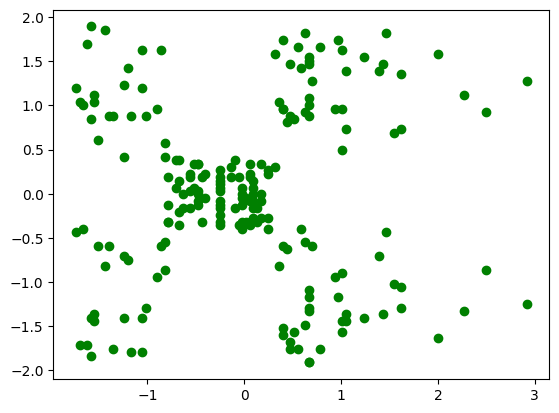

In [146]:
plt.scatter(x[:,0], x[:,1], color='green')
plt.show()

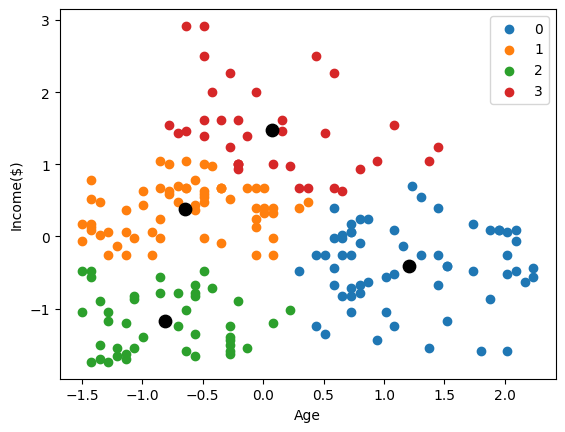

In [85]:
u_labels = np.unique(labels)
for i in u_labels:
    plt.scatter(x[labels == i , 0] , x[labels == i , 1] , label = i)
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'k')
plt.legend()
plt.xlabel("Age")
plt.ylabel("Income($)")
plt.show()

**Generating New Model** :

Now it's time for including all features.The Customer ID is not usable. We should omit it from our dataset.

In [87]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
X[0:5]

array([['Male', 19, 15, 39],
       ['Male', 21, 15, 81],
       ['Female', 20, 16, 6],
       ['Female', 23, 16, 77],
       ['Female', 31, 17, 40]], dtype=object)

As you can see in "Gender" column, we should transfer our string data to numerical one.

In [89]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(['Female','Male'])
X[:,0] = gender.transform(X[:,0]) 
X[0:5]

array([[1, 19, 15, 39],
       [1, 21, 15, 81],
       [0, 20, 16, 6],
       [0, 23, 16, 77],
       [0, 31, 17, 40]], dtype=object)

In [92]:
df['Gender'] = X[:,0]
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


Normaliazing the data:

In [93]:
from sklearn.preprocessing import StandardScaler
ClusdataSet = StandardScaler().fit_transform(X)
ClusdataSet

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

In [112]:
clusterNum = 6
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5 4 5
 4 5 4 2 4 2 1 5 4 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 3 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


Centers of the clusters:

In [113]:
centers = k_means.cluster_centers_
print(centers)

[[ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.34210526 27.         56.65789474 49.13157895]
 [ 0.44444444 56.15555556 53.37777778 49.08888889]
 [ 0.57142857 41.68571429 88.22857143 17.28571429]
 [ 0.40909091 25.27272727 25.72727273 79.36363636]
 [ 0.38095238 44.14285714 25.14285714 19.52380952]]


In [114]:
df["Cluster"] = labels
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,1,19,15,39,5
1,2,1,21,15,81,4
2,3,0,20,16,6,5
3,4,0,23,16,77,4
4,5,0,31,17,40,5
5,6,0,22,17,76,4
6,7,0,35,18,6,5
7,8,0,23,18,94,4
8,9,1,64,19,3,5
9,10,0,30,19,72,4


In [115]:
# Checking the centroid values:
df.groupby('Cluster').mean()

C:\Users\USER\AppData\Local\Temp\ipykernel_676\2600309847.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Cluster').mean()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,162.000000,32.692308,86.538462,82.128205
1,90.052632,27.000000,56.657895,49.131579
2,81.155556,56.155556,53.377778,49.088889
3,164.428571,41.685714,88.228571,17.285714
4,23.090909,25.272727,25.727273,79.363636
5,21.190476,44.142857,25.142857,19.523810


### Visualization:

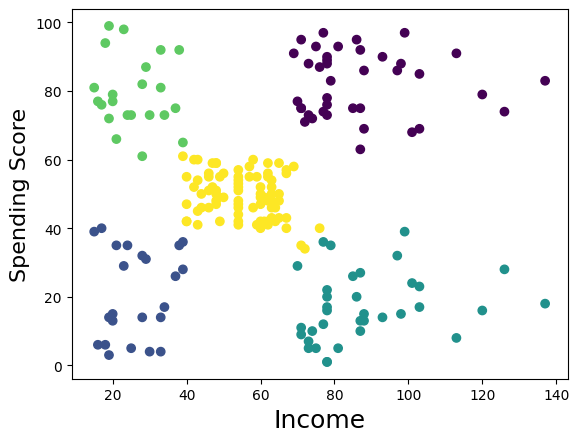

In [145]:
# the variable "area" will shows the age feature.
plt.scatter(X[:, 2], X[:, 3], c=labels.astype(float))
plt.xlabel('Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.show()

By evaluating this model and scatter it above, I recognized that the number of clusters should be 5! So I will generate a new K-Means Model to make it better:

**Generating New Model**:
Now I want to generate a new K-Means Model using **"Income"** and **"Spending Score"** features.

In [138]:
x = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
x[0:10]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

In [139]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)
x[0:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

### Generate the Model:

In [140]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [141]:
centers = k_means.cluster_centers_
print(centers)

[[ 0.99158305  1.23950275]
 [-1.30751869 -1.13696536]
 [ 1.05500302 -1.28443907]
 [-1.32954532  1.13217788]
 [-0.20091257 -0.02645617]]


### Visualize

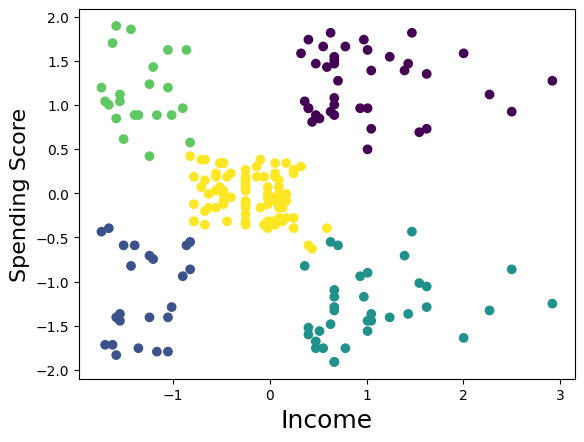

In [143]:
plt.scatter(x[:, 0], x[:, 1], c=labels.astype(float))
plt.xlabel('Income', fontsize=18)
plt.ylabel('Spending Score', fontsize=16)
plt.show()

# Hierarchical Clustering:

In [11]:
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs

In [12]:
df = pd.read_csv(r"C:\Users\USER\Desktop\Machine Learning\1632560262896716.csv")
print ("Shape:", df.shape)
df.head(10)

Shape: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
print(X[:5])

[['Male' 19 15 39]
 ['Male' 21 15 81]
 ['Female' 20 16 6]
 ['Female' 23 16 77]
 ['Female' 31 17 40]]


In [14]:
from sklearn import preprocessing
gender = preprocessing.LabelEncoder()
gender.fit(['Female','Male'])
X[:,0] = gender.transform(X[:,0]) 
Gender = X[:,0]
print(Gender)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [15]:
df['Gender']= Gender
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


Selecting the features:

In [16]:
cdf = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
cdf.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


Doing some kind of **Normalize** stuff (**MinMaxScaler** transforms features by scaling each feature to a given range (0,1))

In [17]:
from sklearn.preprocessing import MinMaxScaler
# Convert to numpy array
x = cdf.values 
min_max_scaler = MinMaxScaler()
cdf_mtx = min_max_scaler.fit_transform(x)
cdf_mtx [0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918]])

Now we should cluster our data using **Scipy package**:

In [18]:
import scipy
leng = cdf_mtx.shape[0]
DM = scipy.zeros([leng,leng])
for i in range(leng):
    for j in range(leng):
        DM[i,j] = scipy.spatial.distance.euclidean(cdf_mtx[i], cdf_mtx[j])
print(DM)

C:\Users\USER\AppData\Local\Temp\ipykernel_5672\1010076033.py:3: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  DM = scipy.zeros([leng,leng])


[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In agglomerative clustering we have to update the distance matrix by iterating the algorithm to generate the best formed cluster. As we studied, I will use **complete** method for calculating the distances in the algorithm:

In [19]:
import pylab
import scipy.cluster.hierarchy
Distance = hierarchy.linkage(DM, 'complete')

C:\Users\USER\AppData\Local\Temp\ipykernel_5672\586857953.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Distance = hierarchy.linkage(DM, 'complete')


In [20]:
from scipy.cluster.hierarchy import fcluster
maximum = 3
Clus = fcluster(Distance, maximum, criterion='distance')
print(Clus)

[20 20  1  7 10  7  1  7 14  7 14  7  2  7 16 20 10 20 15  7 16 20  2 20
  2 20 10 17 10  7 14  7 14 20  2  7 10  7 10  7  3 20 17  9 10  7 11  9
  9  9 11 17  9 15 11 17 11 15  9 15 15 21  3 11 15 21 11  3 21  9 15 11
  3  3 15 21 11 17  9 11 15 17 15 11  9 17 11  9 11 11  3 21 17 11  9 21
 11  9 17 21  9 11 15 21 17  9  3 15 15 15 15  9 11 21  9  9  3 11 11 11
 21 11 11 19  9  8 17 19 12 21 12 21  9  8 13  6  4 21 13  8  5 19  9  6
 13 19 17  8  4 19 12 19  4  8  4  6 12  8 12  8  3  6 13  6 12  8 12  6
  4 21 12 21 12 19  5  6 12 21 12 19  4  6 12  6  4 19  5 21  4  6  4  6
 13  6  5  6  5 18 13 18]


In [21]:
from scipy.cluster.hierarchy import fcluster
k = 5
Clus = fcluster(Distance, k, criterion='maxclust')
print(Clus)

[5 5 1 2 2 2 1 2 3 2 3 2 1 2 4 5 2 5 3 2 4 5 1 5 1 5 2 4 2 2 3 2 3 5 1 2 2
 2 2 2 1 5 4 2 2 2 2 2 2 2 2 4 2 3 2 4 2 3 2 3 3 5 1 2 3 5 2 1 5 2 3 2 1 1
 3 5 2 4 2 2 3 4 3 2 2 4 2 2 2 2 1 5 4 2 2 5 2 2 4 5 2 2 3 5 4 2 1 3 3 3 3
 2 2 5 2 2 1 2 2 2 5 2 2 5 2 2 4 5 3 5 3 5 2 2 3 2 1 5 3 2 1 5 2 2 3 5 4 2
 1 5 3 5 1 2 1 2 3 2 3 2 1 2 3 2 3 2 3 2 1 5 3 5 3 5 1 2 3 5 3 5 1 2 3 2 1
 5 1 5 1 2 1 2 3 2 1 2 1 5 3 5]


### Visualize the Dendogram:

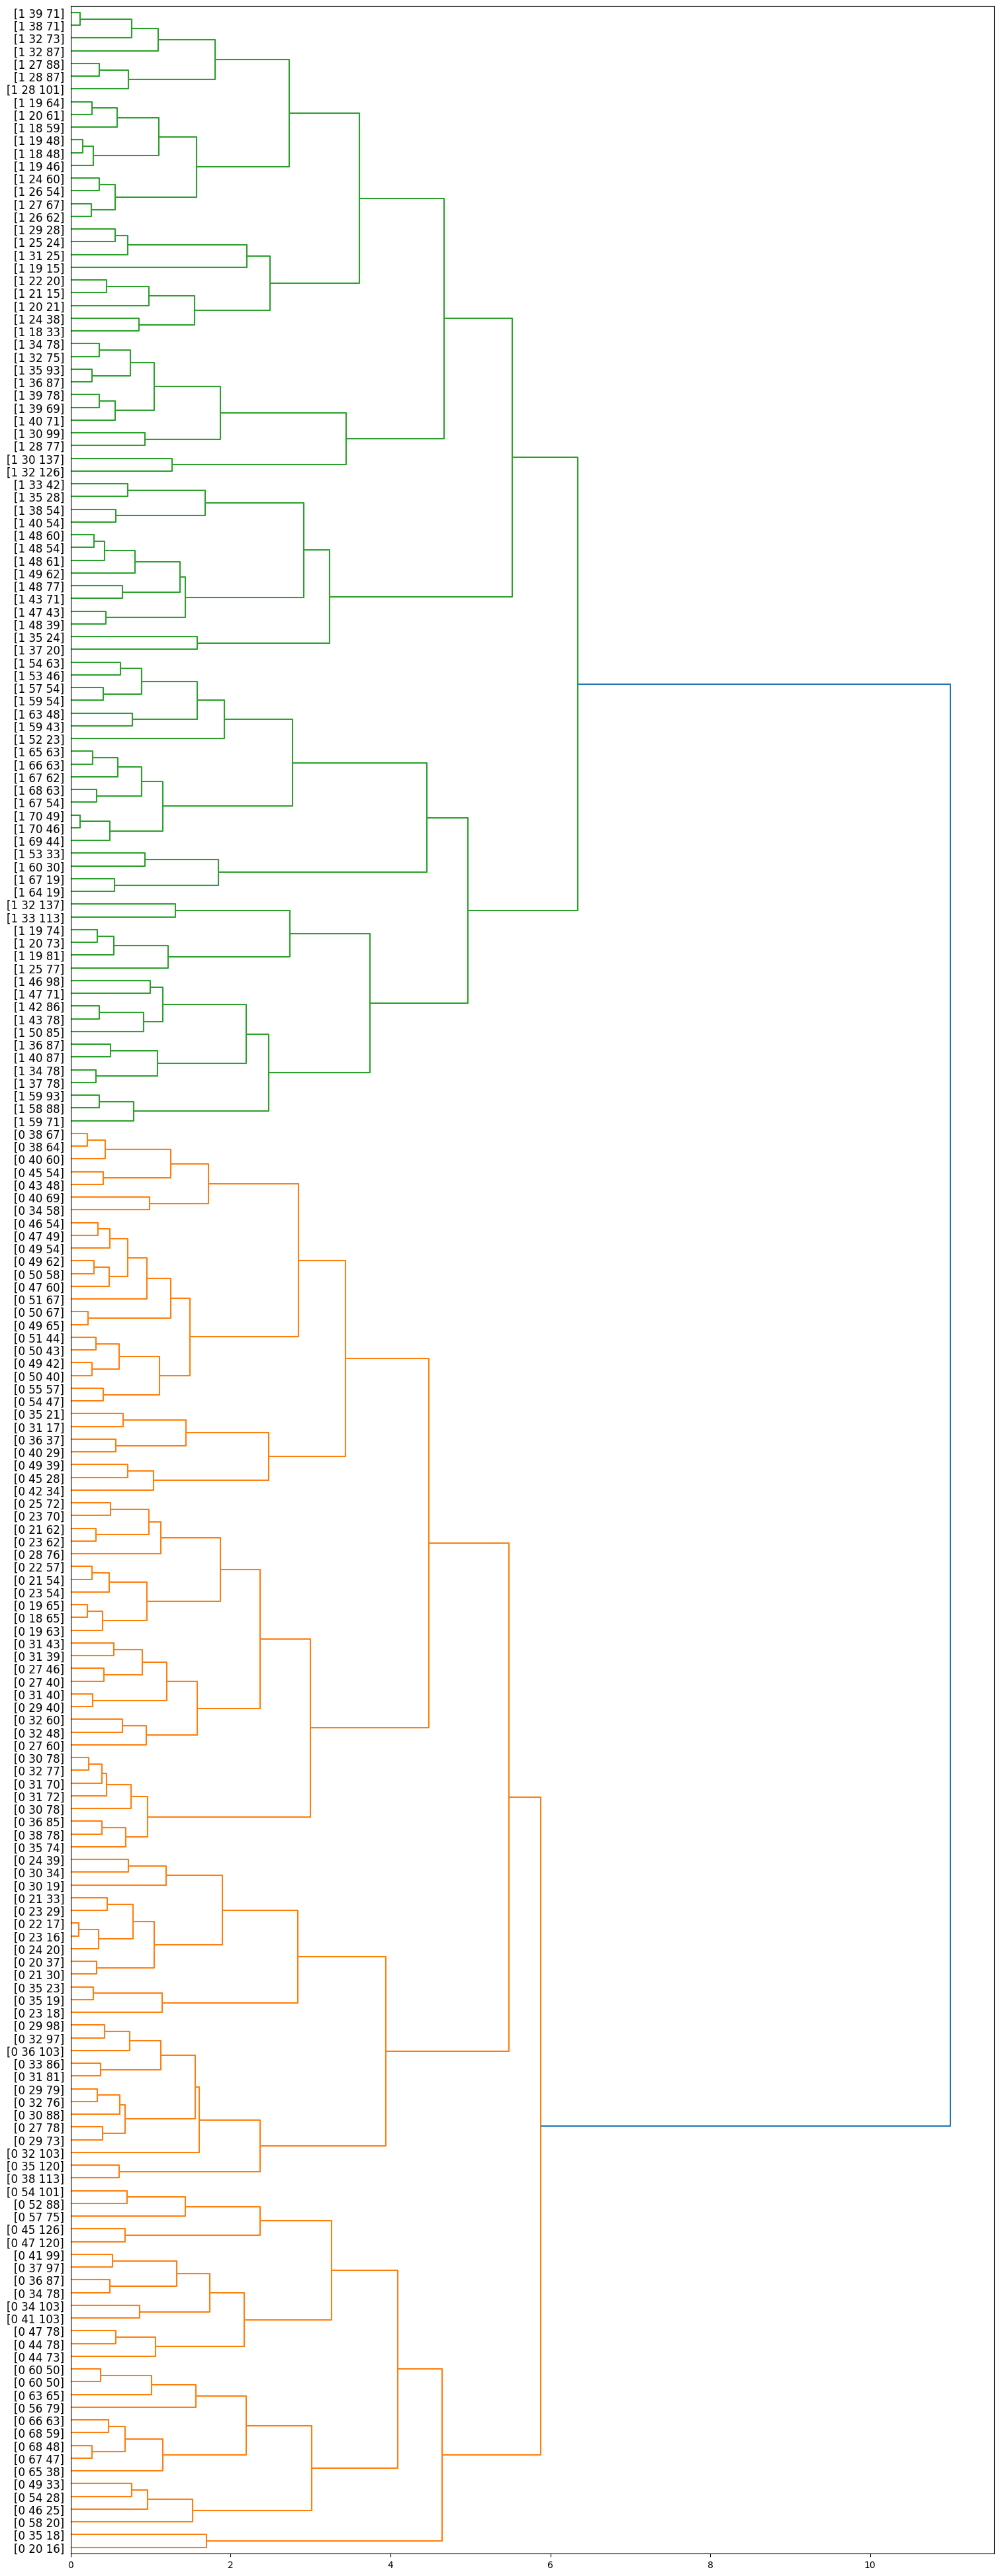

In [22]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (cdf['Gender'][id], cdf['Age'][id], cdf['Annual Income (k$)'][id])
    
dendro = hierarchy.dendrogram(Distance,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

Now I want to cluster my data by **scikit-learn package**:

In [23]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(cdf_mtx,cdf_mtx) 
dist_matrix

array([[0.        , 0.43029381, 1.05538015, ..., 1.00888686, 1.0528145 ,
        1.11639204],
       [0.43029381, 0.        , 1.25941672, ..., 0.93683095, 1.20748243,
        1.01507247],
       [1.05538015, 1.25941672, 0.        , ..., 1.53221213, 1.43245312,
        1.62419301],
       ...,
       [1.00888686, 0.93683095, 1.53221213, ..., 0.        , 0.57849818,
        0.13432353],
       [1.0528145 , 1.20748243, 1.43245312, ..., 0.57849818, 0.        ,
        0.66437953],
       [1.11639204, 1.01507247, 1.62419301, ..., 0.13432353, 0.66437953,
        0.        ]])

In [24]:
D_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\USER\AppData\Local\Temp\ipykernel_5672\4117136525.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  D_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


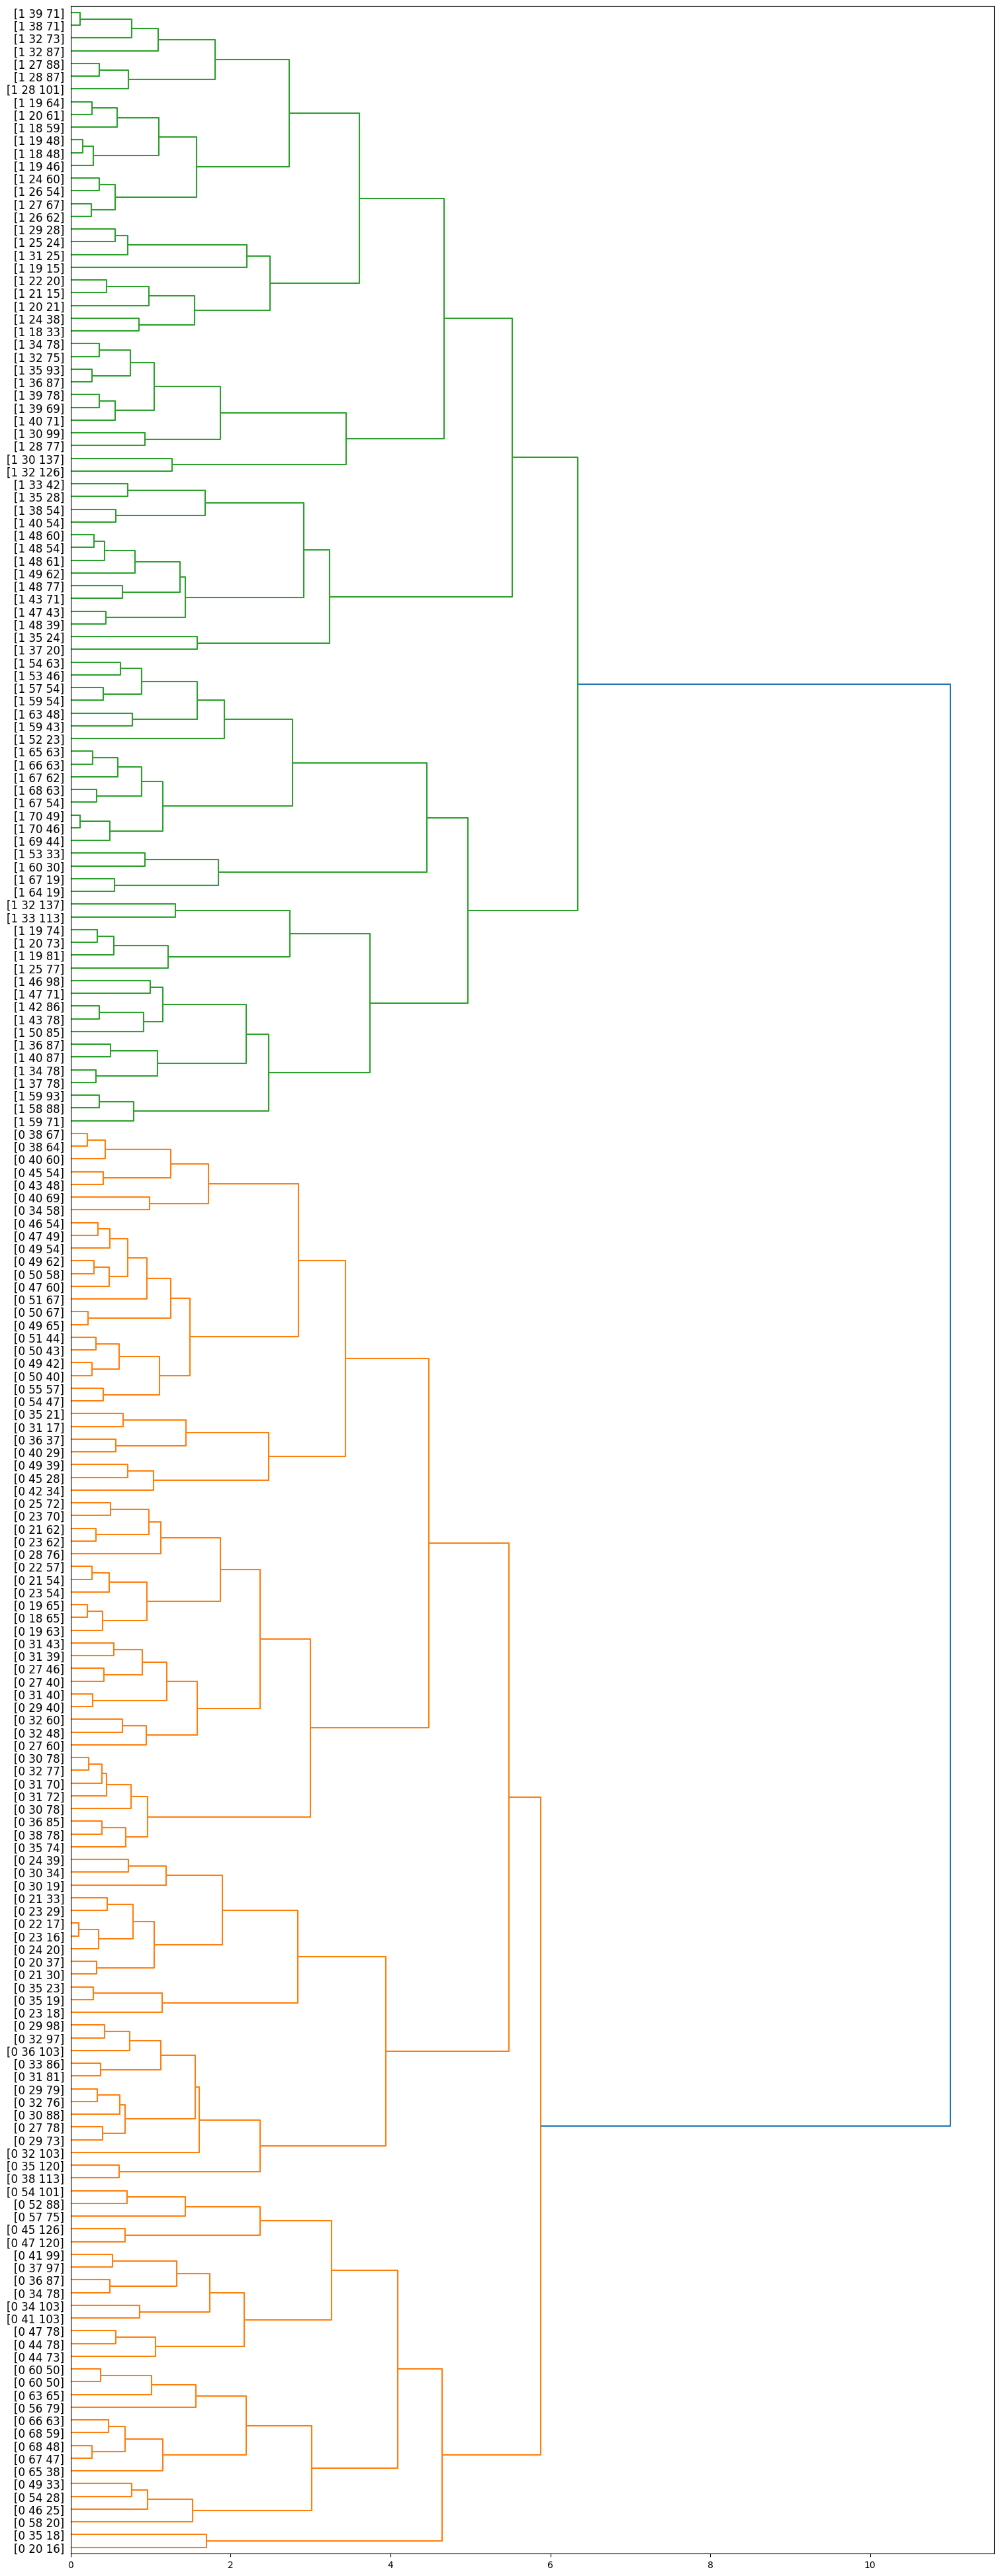

In [25]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (cdf['Gender'][id], cdf['Age'][id], cdf['Annual Income (k$)'][id])
    
dendro = hierarchy.dendrogram(D_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [26]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')
agglom.fit(dist_matrix)
print(agglom.labels_)

[0 0 3 1 1 1 3 1 2 1 2 1 3 1 0 0 1 0 2 1 0 0 3 0 3 0 1 0 1 1 2 1 2 0 3 1 1
 1 1 1 3 0 0 1 1 1 1 1 1 1 1 0 1 2 1 0 1 2 1 2 2 0 3 1 2 0 1 3 0 1 2 1 3 3
 2 0 1 0 1 1 2 0 2 1 1 0 1 1 1 1 3 0 0 1 1 0 1 1 0 0 1 1 2 0 0 1 3 2 2 2 2
 1 1 0 1 1 3 1 1 1 0 1 1 0 1 1 0 0 2 0 2 0 1 1 2 1 3 0 2 1 3 0 1 1 2 0 0 1
 3 0 2 0 3 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 3 0 2 0 2 0 3 1 2 0 2 0 3 1 2 1 3
 0 3 0 3 1 3 1 2 1 3 1 3 0 2 0]


C:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:544: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)


In [27]:
cdf['Cluster'] = agglom.labels_
cdf.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,3
3,0,23,16,77,1
4,0,31,17,40,1
5,0,22,17,76,1
6,0,35,18,6,3
7,0,23,18,94,1
8,1,64,19,3,2
9,0,30,19,72,1
